In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
df = pd.read_csv(r'C:\Users\Admin\resources\house_price_Dống-Da_Hà-Nội_subdata.csv',encoding = 'ISO-8859-1')
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [3]:
#Bộ dữ liệu chứa 671 dòng dữ liệu và 12 cột, chỉ có cột lat, long, property_type là đầy đủ thông tin
#land_certificate, house_direction, balcony_direction: là thuộc tính định tính, có thang đo định danh
#area mặc dù có kiểu số (float64), nhưng các con số này chỉ có ý nghĩa phân biệt khu vực này với khu vực khác –> thuộc tính định danh
#postdate mặc dù có kiểu số (int64) nhưng các con số này chỉ có ý nghĩa phân biệt ngày này với ngày khác -> thuộc tính định danh
#lat, long mặc dù có kiểu số (float64), nhưng các con số này chỉ có ý nghĩa phân biệt khu vực này với khu vực khác –> thuộc tính định danh
#price, toilet, bedroom, floor,lat: thuộc tính định lượng, thang đo ratio 

In [4]:
#Lọc ra các bản ghi bán nhà riêng tại phường Trung liệt hoặc phường Khâm Thiên

In [5]:
#Lọc các thông tin Địa chỉ, Giá, Hướng nhà, Hướng ban công của các bản ghi có giấy chứng nhận sổ đỏ và có 3 phòng ngủ trở lên.
df[(df['land_certificate']=='So do')&(df['bedroom']>=3)].filter(['price','house_direction','balcony_direction'])

,price,house_direction,balcony_direction
0,14700.0,NaN,NaN
1,4200.0,Nam,Nam
2,11000.0,NaN,dong-Nam
3,2900.0,NaN,NaN
6,5280.0,Tay-Nam,NaN
...,...,...,...
650,22500.0,NaN,NaN
653,30000.0,dong-Bac,NaN
659,12000.0,dong-Nam,NaN
663,72000.0,NaN,NaN


In [6]:
#Với mỗi loại nhà đất, tính trung bình cộng giá cũng như giá lớn nhất và giá nhỏ nhất

In [7]:
#Tính trung bình cộng số phòng ngủ, số phòng vệ sinh, số tầng của mỗi phường.

In [8]:
#Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
df.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


In [9]:
#Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
df2=df.dropna(subset='price')
df2

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [10]:
#xử lý giá trị khuyết thiếu
#land_certificate
df2['land_certificate'].fillna('không có thông tin', inplace=True)
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\574288274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['land_certificate'].fillna('không có thông tin', inplace=True)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


In [11]:
#xử lý giá trị khuyết thiếu
#house_direction, balcony_direction, toilet, bedroom, Floor
#Giá trị xuất hiện nhiều nhất
df3=df2.loc[:,'house_direction':'floor'].mode()
df3.columns
for i in df3.columns:
    df2[i].fillna(df3.loc[0,i],inplace=True)
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\2710465668.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i].fillna(df3.loc[0,i],inplace=True)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


In [12]:
df_nha_ngo=df2.loc[df2.property_type == 'trong ngo']

In [13]:
df_nha_ngo['Gia_m2']=round(df_nha_ngo['price']/df_nha_ngo['area'],0)
df_nha_ngo

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\2422823223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha_ngo['Gia_m2']=round(df_nha_ngo['price']/df_nha_ngo['area'],0)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Gia_m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.0
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,74.0
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.0
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,112.0
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,356.0
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272.0
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106.0
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,103.0


In [14]:
df4=df_nha_ngo.loc[:,['area','Gia_m2']]
df4

,area,Gia_m2
0,50.0,294.0
1,57.0,74.0
2,62.0,177.0
3,26.0,112.0
4,40.0,99.0
...,...,...
444,90.0,356.0
445,58.0,272.0
446,96.0,106.0
447,38.0,103.0


In [15]:
# tính giá trị Q1 và Q3
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)

In [16]:
# tính IQR 
IQR = Q3-Q1

In [17]:
# lọc dữ liệu ngoại lai
df5 = df4[~((df4 < (Q1 - 1.5 * IQR)) | (df4 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5

,area,Gia_m2
0,50.0,294.0
1,57.0,74.0
2,62.0,177.0
3,26.0,112.0
4,40.0,99.0
...,...,...
443,25.0,114.0
445,58.0,272.0
446,96.0,106.0
447,38.0,103.0


<AxesSubplot:xlabel='Gia_m2', ylabel='Density'>

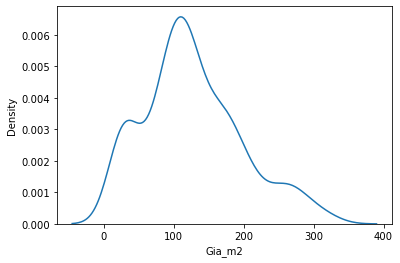

In [25]:
sns.kdeplot(data =df5['Gia_m2'])

<AxesSubplot:ylabel='Density'>

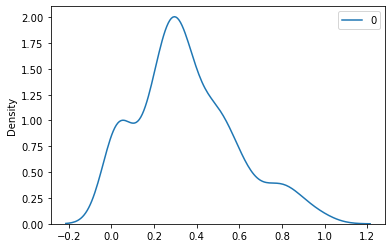

In [26]:
# chuẩn hóa với minmax scaling
scaler = MinMaxScaler()
mms = scaler.fit_transform(pd.DataFrame(df5['Gia_m2']))
sns.kdeplot(data = mms)

<AxesSubplot:ylabel='Density'>

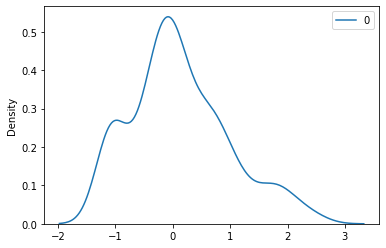

In [27]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df5['Gia_m2']))
sns.kdeplot(data = rbs)

<AxesSubplot:ylabel='Density'>

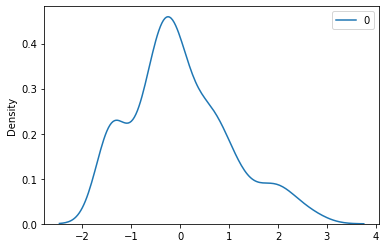

In [28]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df5['Gia_m2']))
sns.kdeplot(data = sc)

In [ ]:
#Có thể nhận thấy ở cả 3 phương pháp chuẩn hóa, phân bố dữ liệu gần như được giữ nguyên, tuy nhiên khoảng giá trị giữ liệu đã thay đổi về khoảng giá trị nhỏ hơn rất nhiều so với ban đầu